# Score Against NIST Assessors

In [34]:
import collections
import glob 
import json

import networkx as nx
import pandas as pd
import os

import matplotlib.pyplot as plt

In [35]:
with open("final-annotated-facts-results.json", "r") as in_file:
    annotation_data = json.load(in_file)

In [36]:
# fact_score = {
#     "USEFUL_FACT": 1.0,
#     "REDUNDANT_FACT": 0.67,
#     "POOR_FACT": 0.33,
#     "LAGGED_FACT": 0.0,
# }

fact_score = {
    "USEFUL_FACT": 1.0,
    "REDUNDANT_FACT": 0.5,
    "POOR_FACT": 0.0,
    "LAGGED_FACT": 0.0,
}


# fact_score = {
#     "USEFUL_FACT": 1.0,
#     "REDUNDANT_FACT": 0.0,
#     "POOR_FACT": 0.0,
#     "LAGGED_FACT": 0.0,
# }

In [37]:
run_scores = []

for req_id,req_data in annotation_data.items():
    print(req_id)
    
    if not os.path.exists("../00-createSummaries/collapsed-event-days/Collapsed-%s.json" % req_id):
        print("CAUTION: No collapsed data for [%s]" % req_id)
        continue
    
    with open("../00-createSummaries/collapsed-event-days/Collapsed-%s.json" % req_id, "r") as in_file:
        collapsed_fact_data = json.load(in_file)
        
    # Generate the scores for each relevant fact the assessor scored
    #. We take the MAXIMUM value associated with a fact for instances
    #. where assessors provided multiple values for a single fact
    fact_df = pd.DataFrame(req_data["fact_list"], columns=["fact_id", "assessor", "label"])
    fact_df["score"] = fact_df["label"].apply(fact_score.get)
    fact_score_df = fact_df[["fact_id", "score"]].groupby("fact_id").max()
    fact_score_map = {idx:row["score"] for idx,row in fact_score_df.iterrows()}
    
    g = nx.Graph()
    for element in collapsed_fact_data:
        collapsed_fact_id = element["collapsed_fact_id"]
        related_facts = element["relevant_facts"]
        
        g.add_node(collapsed_fact_id, vtype="meta", score=fact_score_map.get(collapsed_fact_id,0))
        for sub_fact_id in related_facts:
            g.add_node(sub_fact_id, vtype="raw")
            g.add_edge(sub_fact_id, collapsed_fact_id)
    

    
    # Score this run
    run2facts = [
        (v.replace("%s-" % req_id, "").rpartition("-")[0], v) 
        for v,vd in g.nodes(data=True) if vd["vtype"] != "meta"
    ]

    runsets = {}
    for runtag,fact_id in run2facts:
        this_run_facts = runsets.get(runtag, [])
        this_run_facts.append(fact_id)
        runsets[runtag] = this_run_facts

    nonzero_facts = {v for v,vd in g.nodes(data=True) if vd["vtype"] == "meta" and vd["score"] > 0}
    if len(nonzero_facts) == 0:
        print("CAUTION: No relevant facts in [%s]" % req_id)
        continue
    
    for k,v in runsets.items():

        neighbors = {n_id for f_id in v for n_id in g.neighbors(f_id)}
        local_score = sum([g.nodes[v]["score"] for v in neighbors])
        precision = local_score / len(neighbors)
        recall = len(nonzero_facts.intersection(neighbors)) / len(nonzero_facts)

        run_scores.append((req_id, k, precision, recall))

CrisisFACTS-003-r5
CrisisFACTS-003-r6
CrisisFACTS-003-r7
CrisisFACTS-003-r8
CrisisFACTS-003-r9
CrisisFACTS-003-r10
CrisisFACTS-003-r11
CrisisFACTS-004-r8
CrisisFACTS-004-r9
CrisisFACTS-004-r10
CrisisFACTS-004-r11
CrisisFACTS-004-r12
CrisisFACTS-004-r13
CrisisFACTS-004-r14
CrisisFACTS-004-r15
CrisisFACTS-004-r16
CrisisFACTS-004-r17
CrisisFACTS-004-r18
CrisisFACTS-004-r19
CrisisFACTS-004-r20
CrisisFACTS-004-r21
CrisisFACTS-004-r22
CrisisFACTS-006-r4
CrisisFACTS-006-r5
CrisisFACTS-006-r6
CrisisFACTS-006-r7
CrisisFACTS-007-r13
CrisisFACTS-007-r14
CrisisFACTS-013-r0
CrisisFACTS-013-r1
CrisisFACTS-013-r2
CrisisFACTS-013-r3
CrisisFACTS-013-r4
CrisisFACTS-013-r5
CrisisFACTS-014-r0
CrisisFACTS-014-r1
CrisisFACTS-014-r2
CrisisFACTS-014-r3
CrisisFACTS-014-r4
CrisisFACTS-014-r5
CrisisFACTS-014-r6
CrisisFACTS-001-r3
CrisisFACTS-001-r4
CrisisFACTS-001-r5
CrisisFACTS-001-r6
CrisisFACTS-001-r7
CrisisFACTS-001-r8
CrisisFACTS-001-r9
CrisisFACTS-001-r10
CrisisFACTS-001-r11
CrisisFACTS-011-r0
CrisisFACTS-

In [38]:
run2facts

[('nm-gpt35-bm25', 'CrisisFACTS-009-r0-nm-gpt35-bm25-0016'),
 ('IRLabIITBHU_DFReeKLIM_1',
  'CrisisFACTS-009-r0-IRLabIITBHU_DFReeKLIM_1-0013'),
 ('baseline.v1', 'CrisisFACTS-009-r0-baseline.v1-0013'),
 ('nm-gpt35', 'CrisisFACTS-009-r0-nm-gpt35-0011'),
 ('nm-gpt35-bm25', 'CrisisFACTS-009-r0-nm-gpt35-bm25-0013'),
 ('Thesis_Retriver', 'CrisisFACTS-009-r0-Thesis_Retriver-0000'),
 ('nm-gpt35', 'CrisisFACTS-009-r0-nm-gpt35-0013'),
 ('nut-kslab01', 'CrisisFACTS-009-r0-nut-kslab01-0012'),
 ('Siena.WikiTrigrams1', 'CrisisFACTS-009-r0-Siena.WikiTrigrams1-0019'),
 ('baseline.v2', 'CrisisFACTS-009-r0-baseline.v2-0013'),
 ('IDACCS_occams_extract', 'CrisisFACTS-009-r0-IDACCS_occams_extract-0010'),
 ('IRLabIITBHU_BM25_1', 'CrisisFACTS-009-r0-IRLabIITBHU_BM25_1-0012'),
 ('nm-gpt35', 'CrisisFACTS-009-r0-nm-gpt35-0052'),
 ('nm-gpt35-bm25', 'CrisisFACTS-009-r0-nm-gpt35-bm25-0046'),
 ('nm-gpt35', 'CrisisFACTS-009-r0-nm-gpt35-0048'),
 ('nm-gpt35-bm25', 'CrisisFACTS-009-r0-nm-gpt35-bm25-0038'),
 ('nm-gpt35'

In [39]:
score_df = pd.DataFrame(run_scores, columns=["req_id", "run", "redundancy", "comprehensiveness"])

<Axes: ylabel='req_id'>

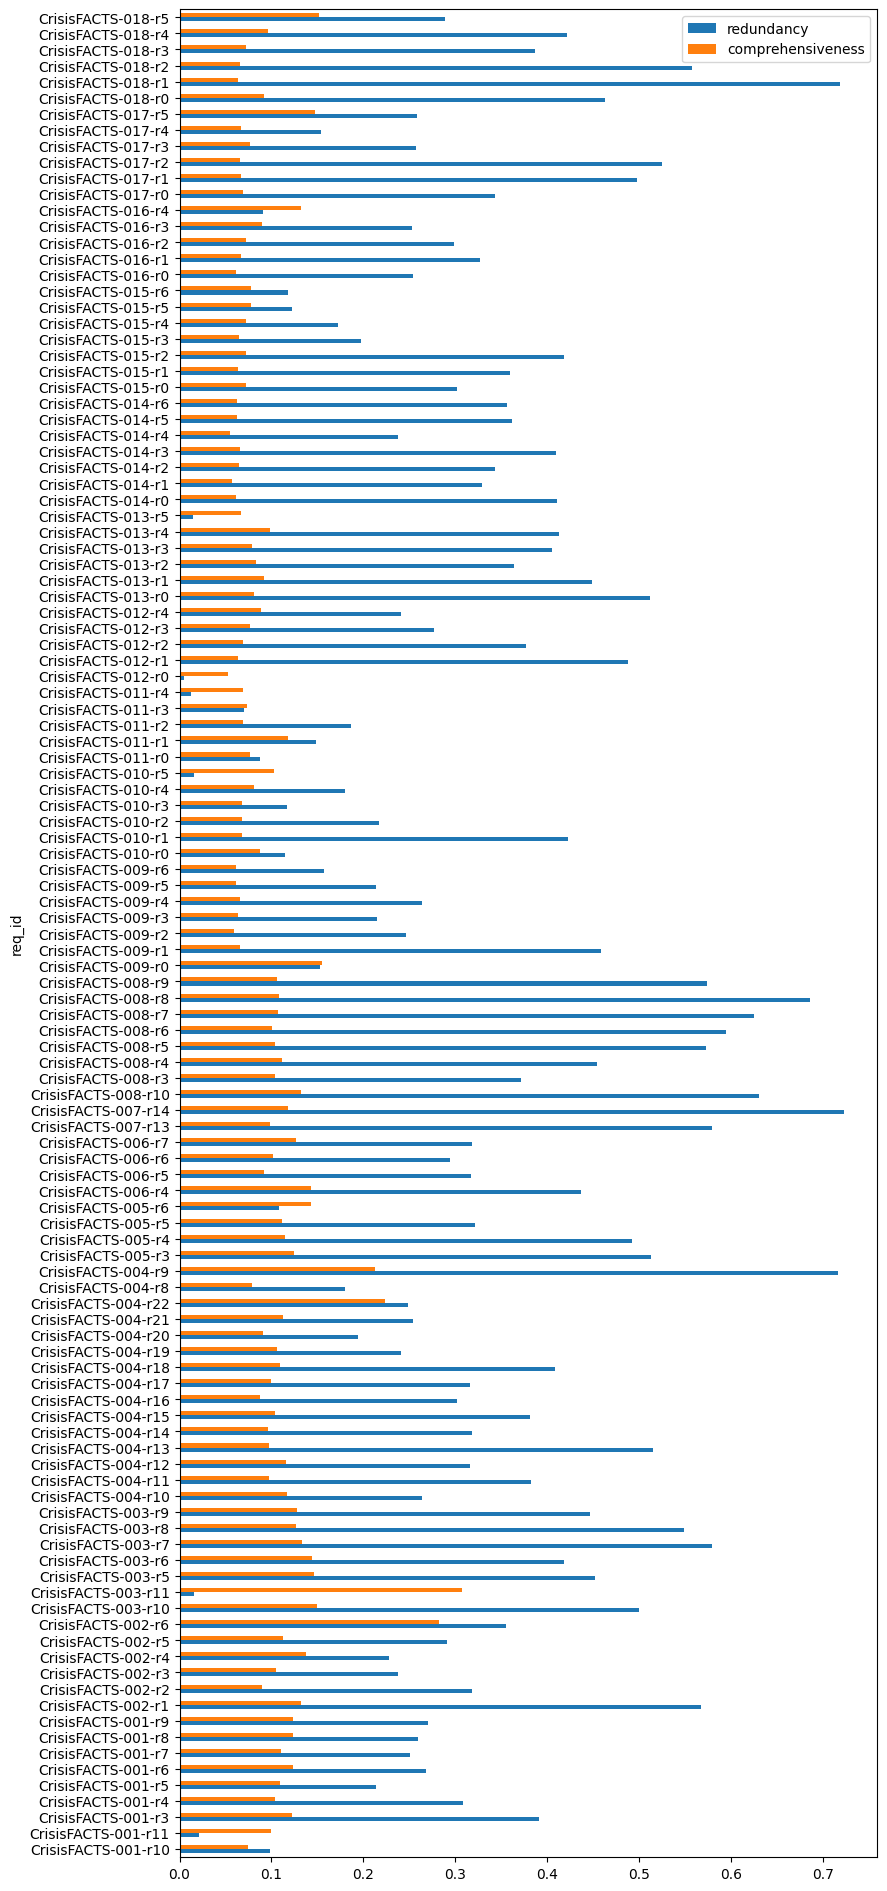

In [40]:
fig = plt.figure(figsize=(9,24))
ax = fig.add_subplot(1,1,1)

score_df[["req_id", "redundancy", "comprehensiveness"]].groupby("req_id").mean().plot.barh(ax=ax)

## Export Run Results

In [41]:
run_metadata_df = pd.read_csv("submissions.csv")

In [42]:
runtag_map = {idx:row["team"] for idx,row in run_metadata_df.set_index("runtag").iterrows()}
runtag_map

{'Thesis_Retriver': 'thesis.v1'}

In [43]:
score_df

,req_id,run,redundancy,comprehensiveness
0,CrisisFACTS-003-r5,llama,0.450,0.147059
1,CrisisFACTS-003-r5,nm-gpt35-bm25,0.225,0.088235
2,CrisisFACTS-003-r5,Human_Info_Lab-FM-A,0.275,0.088235
3,CrisisFACTS-003-r5,nm-gpt35,0.775,0.250000
4,CrisisFACTS-003-r5,V-TorontoMU_USE_4,0.100,0.044118
...,...,...,...,...
1872,CrisisFACTS-009-r0,V-TorontoMU_USE_4,0.000,0.000000
1873,CrisisFACTS-009-r0,llama,1.000,0.090909
1874,CrisisFACTS-009-r0,Human_Info_Lab-FM-B,0.100,0.181818
1875,CrisisFACTS-009-r0,llama_13b_chat,0.000,0.000000


In [44]:
for run_tag,group in score_df.groupby("run"):
    if run_tag not in runtag_map:
        print("Skipping [%s]" % run_tag)
        continue
    runname = "%s.%s.csv" % (runtag_map[run_tag], run_tag)
    print(run_tag, "-->", runname)
    try:
        group.to_csv("evaluation.output.assessors/%s" % runname)
    except:
        os.makedirs("evaluation.output.assessors")
        group.to_csv("evaluation.output.assessors/%s" % runname)

Skipping [Human_Info_Lab-FM-A]
Skipping [Human_Info_Lab-FM-B]
Skipping [IDACCS_occamsHybridGPT3.5]
Skipping [IDACCS_occams_extract]
Skipping [IRLabIITBHU_BM25_1]
Skipping [IRLabIITBHU_DFReeKLIM_1]
Skipping [Siena.FactTrigrams1]
Skipping [Siena.WikiTrigrams1]
Thesis_Retriver --> thesis.v1.Thesis_Retriver.csv
Skipping [V-TorontoMU_USE_4]
Skipping [baseline.v1]
Skipping [baseline.v2]
Skipping [drdqn-all]
Skipping [drdqn-notopic]
Skipping [llama]
Skipping [llama_13b_chat]
Skipping [nm-gpt35]
Skipping [nm-gpt35-bm25]
Skipping [nut-kslab01]


In [45]:
score_df["team"] = score_df["run"].apply(runtag_map.get)

In [46]:
score_df.to_csv("evaluation.output.assessors/all_runs.csv")

In [47]:
score_df = pd.read_csv("evaluation.output.assessors/all_runs.csv", index_col=0)

In [48]:
score_df

,req_id,run,redundancy,comprehensiveness,team
0,CrisisFACTS-003-r5,llama,0.450,0.147059,NaN
1,CrisisFACTS-003-r5,nm-gpt35-bm25,0.225,0.088235,NaN
2,CrisisFACTS-003-r5,Human_Info_Lab-FM-A,0.275,0.088235,NaN
3,CrisisFACTS-003-r5,nm-gpt35,0.775,0.250000,NaN
4,CrisisFACTS-003-r5,V-TorontoMU_USE_4,0.100,0.044118,NaN
...,...,...,...,...,...
1872,CrisisFACTS-009-r0,V-TorontoMU_USE_4,0.000,0.000000,NaN
1873,CrisisFACTS-009-r0,llama,1.000,0.090909,NaN
1874,CrisisFACTS-009-r0,Human_Info_Lab-FM-B,0.100,0.181818,NaN
1875,CrisisFACTS-009-r0,llama_13b_chat,0.000,0.000000,NaN


In [50]:
score_df.groupby("req_id").agg({"redundancy": "mean", "comprehensiveness": "mean"})

,redundancy,comprehensiveness
req_id,,
CrisisFACTS-001-r10,0.098601,0.074176
CrisisFACTS-001-r11,0.020805,0.100000
CrisisFACTS-001-r3,0.390873,0.122449
CrisisFACTS-001-r4,0.308453,0.103795
CrisisFACTS-001-r5,0.213751,0.108929
...,...,...
CrisisFACTS-018-r1,0.718787,0.063947
CrisisFACTS-018-r2,0.558193,0.066035
CrisisFACTS-018-r3,0.386423,0.072239
